<a href="https://colab.research.google.com/github/2003Yash/xgboost-regressor/blob/main/Xgboost_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Generate a simple time series dataset (you can replace this with any dataset)
# For demonstration, let's create a sine wave series as an example dataset
np.random.seed(42) # This line sets the random number generator to a fixed state.
time = np.arange(0, 100, 0.1) # This line creates an array of values starting from 0 to 100, with a step of 0.1 i.e.., check below 0 to 1 has 10 numbers
series = np.sin(time) + np.random.normal(scale=0.1, size=len(time))  # Sine wave with noise

In [ ]:
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [ ]:
series

array([ 0.04967142,  0.08600699,  0.26343818,  0.44782319,  0.366003  ,
        0.45601184,  0.72256375,  0.72096116,  0.67040865,  0.83758291,
        0.79512922,  0.84463438,  0.95623531,  0.77223016,  0.81295795,
        0.94126623,  0.89829049,  1.02308954,  0.88304522,  0.80506972,
        1.0558623 ,  0.84063174,  0.81524922,  0.60323039,  0.62102491,
        0.6095644 ,  0.40040201,  0.46494968,  0.27492428,  0.21007995,
        0.08094935,  0.22680848, -0.05972387, -0.26351679, -0.17328661,
       -0.47286759, -0.42163408, -0.72580315, -0.7446765 , -0.66808004,
       -0.68295584, -0.80114028, -0.8831406 , -0.94627631, -1.09945427,
       -1.04951454, -1.03975488, -0.89421103, -0.96180278, -1.15875663,
       -0.92651588, -0.96432291, -0.95114686, -0.77109981, -0.66966454,
       -0.61241231, -0.71518839, -0.58160678, -0.43147584, -0.27632215,
       -0.32733292, -0.2007284 , -0.1937229 , -0.10280676,  0.19780179,
        0.35074399,  0.30434035,  0.50520321,  0.53027695,  0.51

In [ ]:
time.shape

(1000,)

In [ ]:
series.shape

(1000,)

In [ ]:
# Step 2: Create lag features (to frame it as a supervised learning problem)
def create_lag_features(series, lag=10):
    df = pd.DataFrame({'value': series})
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['value'].shift(i)
    df.dropna(inplace=True)
    return df

In [ ]:
# Generate lag features
lag = 10  # Number of lags to use for forecasting
data = create_lag_features(series, lag)

In [ ]:
data

,value,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
10,0.795129,0.837583,0.670409,0.720961,0.722564,0.456012,0.366003,0.447823,0.263438,0.086007,0.049671
11,0.844634,0.795129,0.837583,0.670409,0.720961,0.722564,0.456012,0.366003,0.447823,0.263438,0.086007
12,0.956235,0.844634,0.795129,0.837583,0.670409,0.720961,0.722564,0.456012,0.366003,0.447823,0.263438
13,0.772230,0.956235,0.844634,0.795129,0.837583,0.670409,0.720961,0.722564,0.456012,0.366003,0.447823
14,0.812958,0.772230,0.956235,0.844634,0.795129,0.837583,0.670409,0.720961,0.722564,0.456012,0.366003
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.885905,-1.004985,-1.011009,-0.996096,-1.194413,-0.978369,-0.995502,-1.009297,-0.878610,-0.785498,-1.011814
996,-0.622428,-0.885905,-1.004985,-1.011009,-0.996096,-1.194413,-0.978369,-0.995502,-1.009297,-0.878610,-0.785498
997,-0.674498,-0.622428,-0.885905,-1.004985,-1.011009,-0.996096,-1.194413,-0.978369,-0.995502,-1.009297,-0.878610
998,-0.724706,-0.674498,-0.622428,-0.885905,-1.004985,-1.011009,-0.996096,-1.194413,-0.978369,-0.995502,-1.009297


In [ ]:
# Step 3: Train-test split
X = data.drop('value', axis=1)  # Lagged features
y = data['value']               # Target (current value)

# Splitting data into 80% training and 20% testing
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Step 4: Train XGBoost Regressor model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Step 5: Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 6: Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.12275136578543312


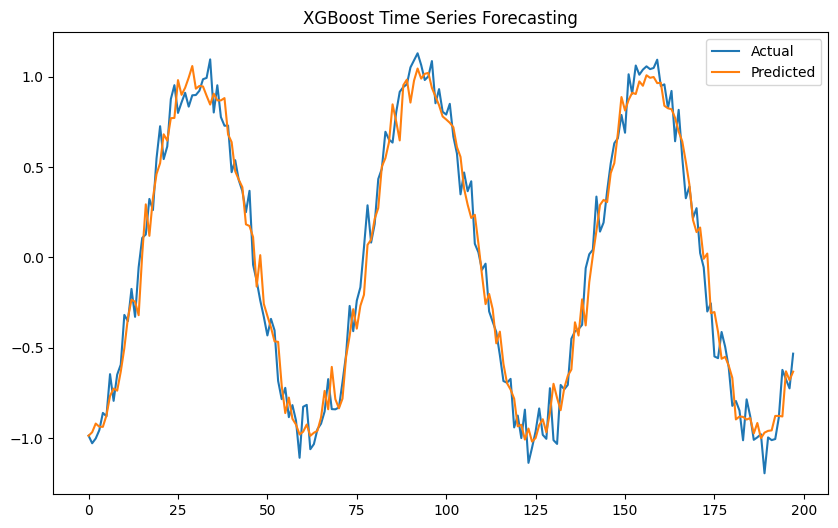

In [ ]:
# Step 7: Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Time Series Forecasting')
plt.legend()
plt.show()